In [12]:
import consMDP
import reachability
import importlib
import dot
importlib.reload(consMDP)
importlib.reload(reachability)
importlib.reload(dot)
dot.dotpr = "neato"

## Almost sure reachability example
 * it should distinguish between positive and almost-sure reachability:
   - target that does not reach any other target
   - target reachable by an action that can lead to a dead-end for a low cost (and maybe has another way to reach the target surely for a high cost) 
 * the good path goes via at least one reload
   - the reload should be enabled by the same state

Capacity should be 25

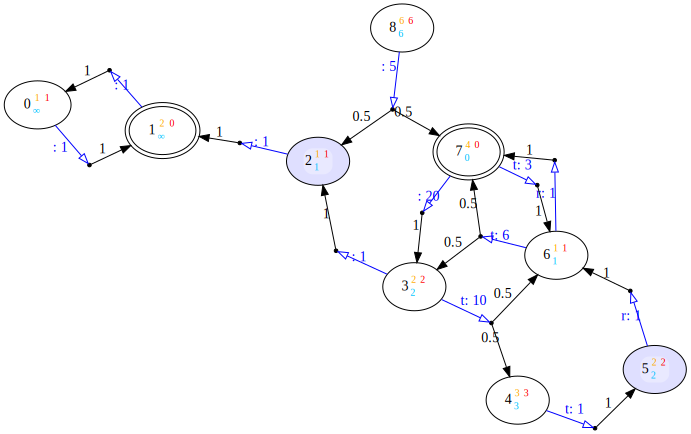

In [18]:
from reachability_example import m, targets
m.get_positiveReachability(targets, 25)
m

In [20]:
# %load reachability_example.py
#!/usr/bin/env python

import consMDP
import reachability
import importlib
import dot
importlib.reload(consMDP)
importlib.reload(reachability)
importlib.reload(dot)
dot.dotpr = "neato"


# ## Almost sure reachability example
#  * it should distinguish between positive and almost-sure reachability:
#    - target that does not reach any other target
#    - target reachable by an action that can lead to a dead-end for a low cost (and maybe has another way to reach the target surely for a high cost) 
#  * the good path goes via at least one reload
#    - the reload should be enabled by the same state
# 
# Capacity should be 25

m = consMDP.ConsMDP()

m.new_states(9)
for s in [1, 7]:
    m.set_reload(s)

m.add_action(0, {1:1}, "", 1)
m.add_action(1, {0:1}, "", 1)
m.add_action(2, {1:1}, "", 1)
m.add_action(3, {2:1}, "", 1)
m.add_action(3, {4:.5, 6:.5},"t", 10)
m.add_action(4, {5:1}, "t", 1)
m.add_action(5, {6:1}, "r", 1)
m.add_action(6, {3:.5, 7:.5}, "t", 6)
m.add_action(6, {7:1}, "r", 1)
m.add_action(7, {3:1}, "", 20)
m.add_action(7, {6:1}, "t", 3)
m.add_action(8, {7:.5, 2:.5}, "", 5)

targets = set([2,5])